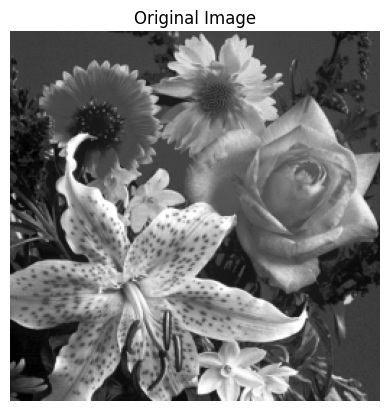

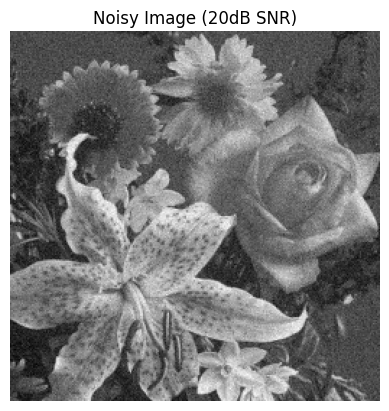

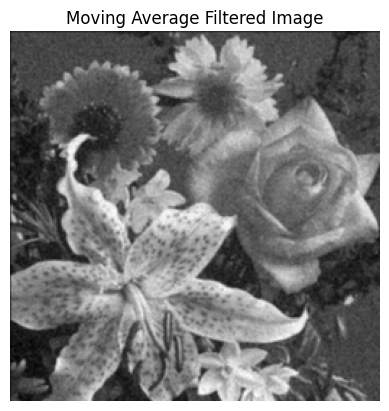

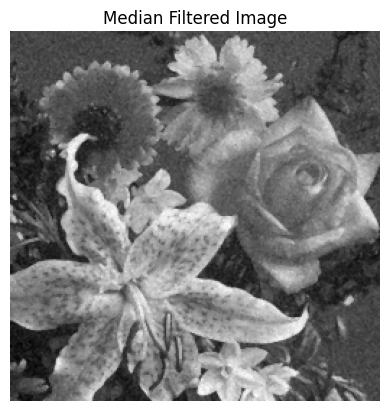

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter, median_filter
from scipy.io import loadmat

mat_data = loadmat(r'data\Lab1\task2\flower.mat')
image = mat_data['flower']


def add_gaussian_noise(image, snr_db):
    # Calculate the power of the signal
    signal_power = np.mean(image ** 2)
    
    # Calculate noise power for the desired SNR in dB
    snr_linear = 10 ** (snr_db / 10)
    noise_power = signal_power / snr_linear
    
    # Standard deviation of the Gaussian noise
    noise_std = np.sqrt(noise_power)
    
    # Generate Gaussian noise
    noise = np.random.normal(0, noise_std, image.shape)
    
    # Add the noise to the image
    return image + noise

# Function to display images
def display_image(image, title, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Add Gaussian noise to achieve 20dB SNR
snr_db = 20
noisy_image = add_gaussian_noise(image, snr_db)

# Apply a moving average filter (uniform filter)
moving_average_filtered = uniform_filter(noisy_image, size=2,mode='constant')

# Apply a median filter
median_filtered = median_filter(noisy_image, size=2)


# Display the images
display_image(image, 'Original Image')
display_image(noisy_image, 'Noisy Image (20dB SNR)')
display_image(moving_average_filtered, 'Moving Average Filtered Image')
display_image(median_filtered, 'Median Filtered Image')


In [24]:
# COMMENTS: The moving average and the median filtering is not giving very good results.
#The moving average and median filters are ineffective against Gaussian noise because they are not adaptive and treat all pixels equally, 
# including noise, leading to blurring rather than effective noise reduction.



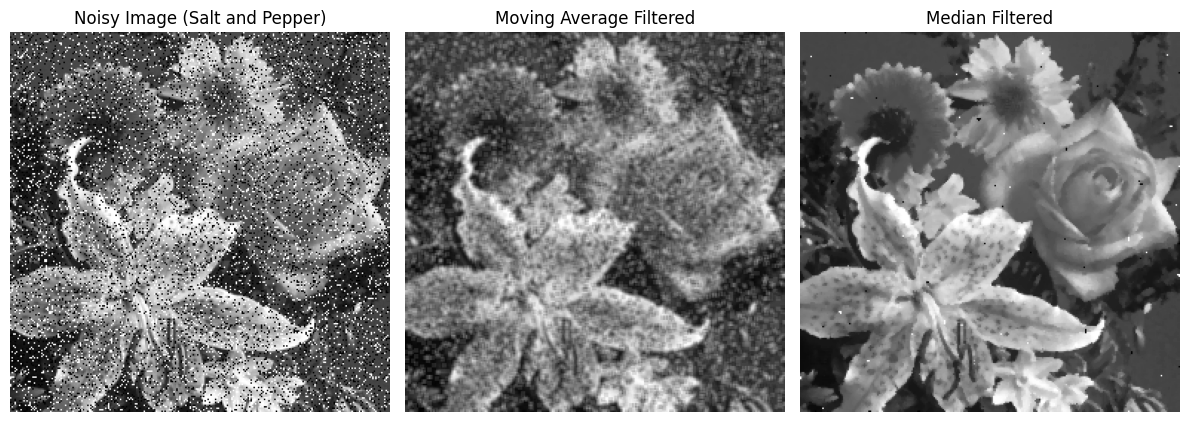

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.ndimage import uniform_filter, median_filter

#CORRUPT IMAGE with salt and pepper noise of 20% and then apply image filtering

def add_salt_and_pepper_noise(image, amount):
    noisy_image = image.copy()
    num_salt = int(np.ceil(amount * image.size * 0.5))
    num_pepper = int(np.ceil(amount * image.size * 0.5))
    coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy_image[tuple(coords)] = 1
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy_image[tuple(coords)] = 0
    return noisy_image

noisy_image = add_salt_and_pepper_noise(image, amount=0.2)
moving_average_filtered = uniform_filter(noisy_image, size=3)
median_filtered = median_filter(noisy_image, size=3)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(noisy_image,cmap='grey')
plt.axis('off')
plt.title('Noisy Image (Salt and Pepper)')

plt.subplot(1, 3, 2)
plt.imshow(moving_average_filtered, cmap='gray')
plt.axis('off')
plt.title('Moving Average Filtered')

plt.subplot(1, 3, 3)
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')
plt.title('Median Filtered')

plt.tight_layout()
plt.show()

In [32]:
## Here it is pretty obvious that the median filtering is producing signifcantly better results. 

#Why: Median filtering effectively removes salt and pepper noise because it replaces each pixel with the median value of its surrounding neighborhood. 
# This process eliminates isolated high-intensity (salt) and low-intensity (pepper) pixels by considering the middle value.
# this filters out the outliers while preserving image details.

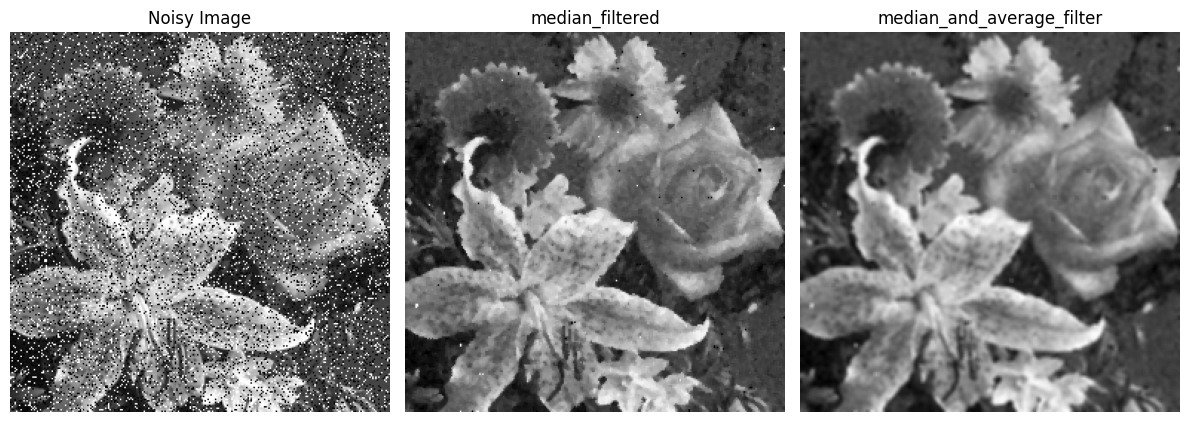

In [35]:
gaussian_noise = add_gaussian_noise(image,20)
fully_corrupt = add_salt_and_pepper_noise(gaussian_noise,0.2)
median_filtered = median_filter(fully_corrupt, size=3)
median_and_average_filter= uniform_filter(median_filtered, size=3)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(noisy_image,cmap='grey')
plt.axis('off')
plt.title('Noisy Image')

plt.subplot(1, 3, 2)
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')
plt.title('median_filtered')

plt.subplot(1, 3, 3)
plt.imshow(median_and_average_filter, cmap='gray')
plt.axis('off')
plt.title('median_and_average_filter')

plt.tight_layout()
plt.show()

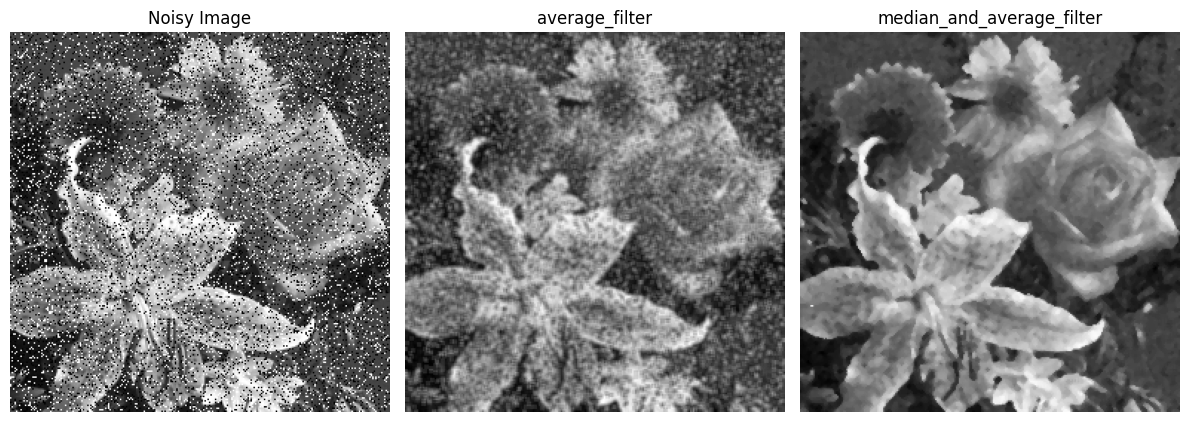

In [36]:
gaussian_noise = add_gaussian_noise(image,20)
fully_corrupt = add_salt_and_pepper_noise(gaussian_noise,0.2)
avg_filtered = uniform_filter(fully_corrupt, size=3)
median_and_average_filter= median_filter(median_filtered, size=3)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(noisy_image,cmap='grey')
plt.axis('off')
plt.title('Noisy Image')

plt.subplot(1, 3, 2)
plt.imshow(avg_filtered, cmap='gray')
plt.axis('off')
plt.title('average_filter')

plt.subplot(1, 3, 3)
plt.imshow(median_and_average_filter, cmap='gray')
plt.axis('off')
plt.title('median_and_average_filter')

plt.tight_layout()
plt.show()

In [ ]:
#Comments: I thought at first that median filter (to remove the salt and pepper noise) followed by moving average (to remove the gaussian noise)
#would produce the best results. However, here it evidently does not. Moving average (which gives equal weight to all cells)
#performs poorly on gaussian distribution, which normally distributes pixel intensity variations around the true value.